In [22]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score
import clustering_utils
from itertools import combinations

In [25]:
users_df = pd.read_csv("../dataset/users_df_dataset_cleaned_with_indicators.csv")

columns_30_spearman = ['avg_hashtags', 'avg_special_char_in_text', 'entropy_for_minute', 'entropy_original_text']
columns_50_spearman = ['account_discussion_creation_ratio', 'avg_hashtags', 
                        'avg_special_char_in_text', 'avg_reply_count', 
                        'entropy_for_minute', 'entropy_original_text']
columns_70_spearman = ['account_discussion_creation_ratio', 'avg_hashtags', 'avg_mentions', 
                        'avg_special_char_in_text', 'avg_tweets_per_actual_day', 'avg_reply_count', 
                        'entropy_for_minute', 'entropy_original_text']

columns_10_pearson = ['avg_hashtags', 'entropy_text']
users_df_10_pearson = users_df[columns_10_pearson]

users_df_30 = users_df[columns_30_spearman]
users_df_50 = users_df[columns_50_spearman]
users_df_70 = users_df[columns_70_spearman]

def getDataFrame(percentage=70):
    if(percentage == 30):
        return users_df_30
    elif (percentage==50):
        return users_df_50
    elif (percentage==70):
        return users_df_70
    elif (percentage==10):
        return users_df_10_pearson


## Running multiple K-means and plotting SSE Spearman

Trying to plot the relation between K centroids and SSE, to enstablish the best K for each test.

Text(0.5, 0, 'Clusters')

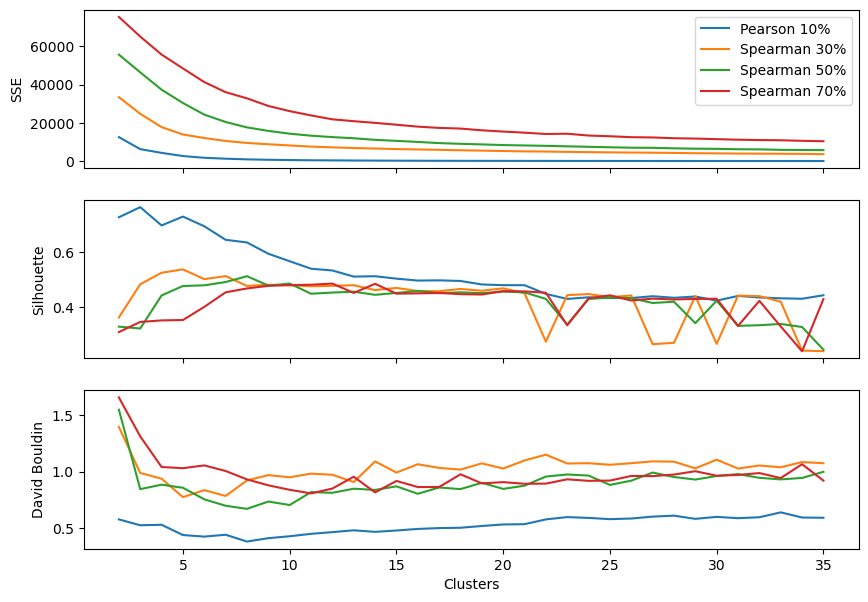

In [27]:
_, axS = plt.subplots(3, figsize=(10, 7), sharex=True)

transform_result = {}
scalers = {}

for percentage in sorted([10, 30, 50, 70]):
    subset_df = getDataFrame(percentage=percentage)
    scalers[percentage] = StandardScaler()
    scalers[percentage].fit(subset_df.values)
    transform_result[percentage] = scalers[percentage].fit_transform(subset_df.values)
    results = []
    for k in range(2,36):
            kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
            kmeans.fit(transform_result[percentage])
            SSE = kmeans.inertia_
            SIL = silhouette_score(transform_result[percentage], kmeans.labels_)
            DAVID = davies_bouldin_score(transform_result[percentage], kmeans.labels_)
            results.append([k, SSE, SIL, DAVID])
        
    results_df = pd.DataFrame(results, columns=["K", "SSE", "SIL", "DAVID"])
    axS[0].plot(results_df['K'], results_df['SSE'])
    axS[1].plot(results_df['K'], results_df['SIL'])
    axS[2].plot(results_df['K'], results_df['DAVID'])

axS[0].set_ylabel('SSE')
axS[0].legend(['Pearson 10%', 'Spearman 30%', 'Spearman 50%', 'Spearman 70%'])
axS[1].set_ylabel('Silhouette')
axS[2].set_ylabel('David Bouldin')
axS[2].set_xlabel('Clusters')

# KMeans Spearman 



[Text(0.5, 1.0, 'Actual Bots'), None, None]

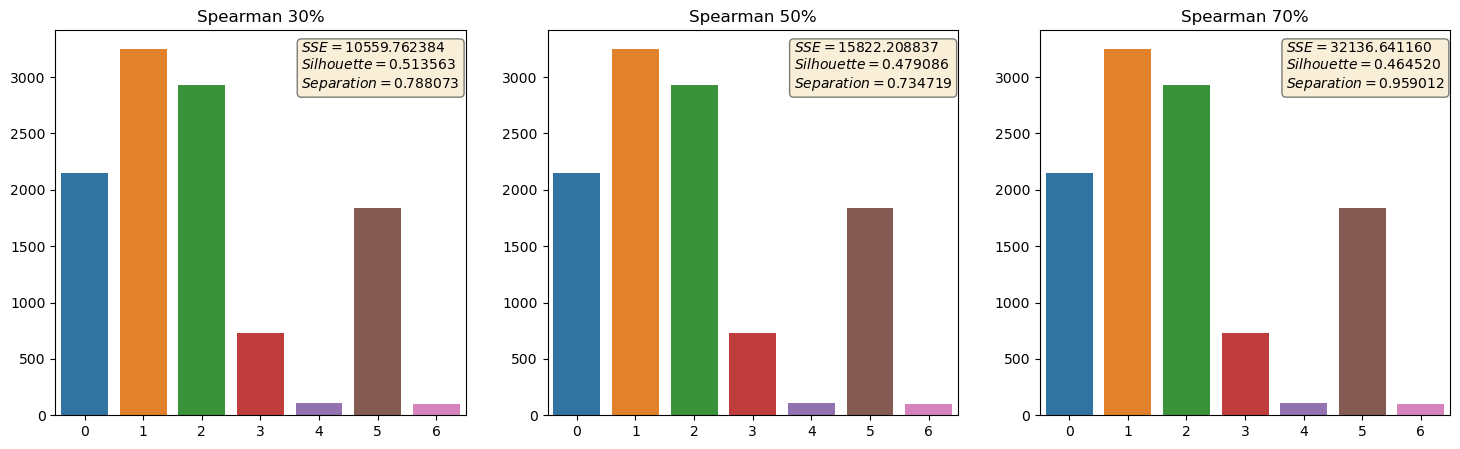

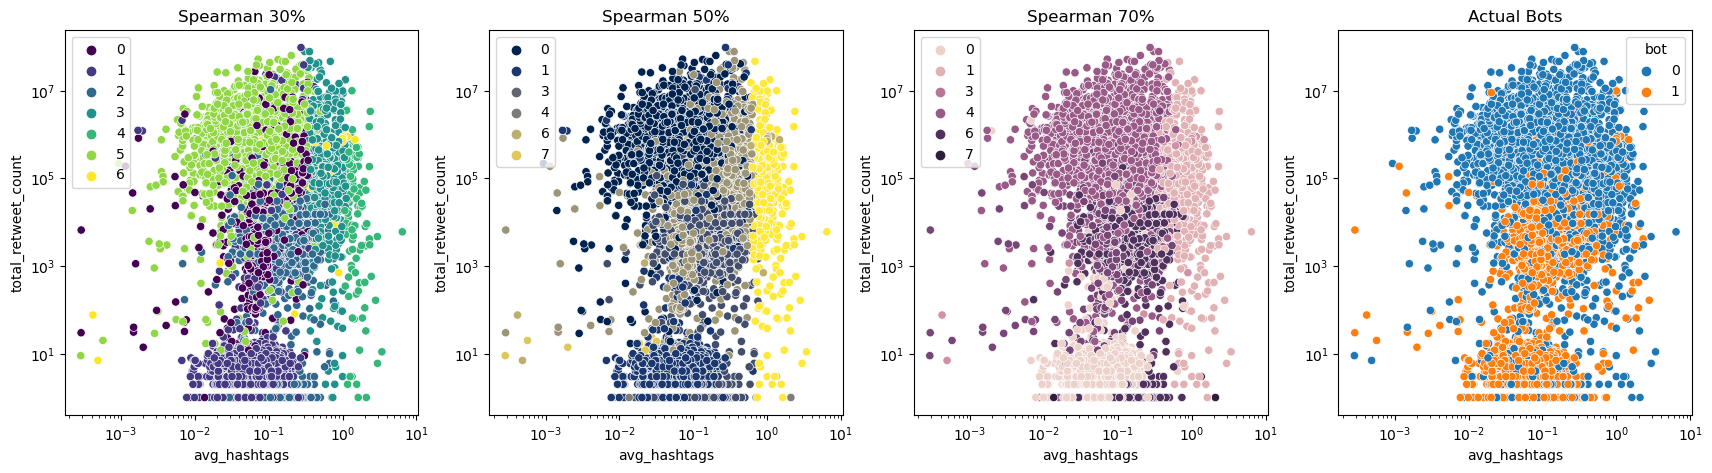

In [32]:
combination = ['avg_hashtags', 'total_retweet_count']
num_of_clusters = {70: 8, 50: 9, 30: 7}
num_of_iter = 100
transform_result = {}
kmeans = {}
scalers = {}
centers = {}
clusters_id = {}
clusters_sizes = {}
fig, (ax, axx, axxx) = plt.subplots(1, 3, figsize=(18, 5))
fig3, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(21, 5))

import seaborn as sns

for percentage in [30, 50, 70]:
    subset_df = getDataFrame(percentage=percentage)
    scalers[percentage] = StandardScaler()
    scalers[percentage].fit(subset_df.values)
    transform_result[percentage] = scalers[percentage].fit_transform(subset_df.values)
    kmeans[percentage] = KMeans(n_clusters=num_of_clusters[percentage], n_init=10, max_iter=num_of_iter)
    kmeans[percentage].fit(transform_result[percentage])
    clusters_id[percentage], clusters_sizes[percentage] = np.unique(kmeans[percentage].labels_, return_counts=True)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
sns.barplot(x=clusters_id[30], y=clusters_sizes[30], ax=ax).annotate(clustering_utils.get_clustering_metrics(kmeans[30], transform_result[30]), xy=(0.60, 0.85), xycoords='axes fraction', bbox=props)
sns.barplot(x=clusters_id[30], y=clusters_sizes[30], ax=axx).annotate(clustering_utils.get_clustering_metrics(kmeans[50], transform_result[50]), xy=(0.60, 0.85), xycoords='axes fraction', bbox=props)
sns.barplot(x=clusters_id[30], y=clusters_sizes[30], ax=axxx).annotate(clustering_utils.get_clustering_metrics(kmeans[70], transform_result[70]), xy=(0.60, 0.85), xycoords='axes fraction', bbox=props)
ax.set(title='Spearman 30%')
axx.set(title='Spearman 50%')
axxx.set(title='Spearman 70%')

sns.barplot()

# Scatter Plot for attribute with correlation below 0.7
sns.scatterplot(users_df, x=combination[0], y=combination[1], hue=kmeans[30].labels_, ax=ax1, palette='viridis').set(title='Spearman 30%', xscale="log", yscale="log")
sns.scatterplot(users_df, x=combination[0], y=combination[1], hue=kmeans[50].labels_, ax=ax2, palette='cividis').set(title='Spearman 50%', xscale="log", yscale="log")
sns.scatterplot(users_df, x=combination[0], y=combination[1], hue=kmeans[70].labels_, ax=ax3).set(title='Spearman 70%', xscale="log", yscale="log")
sns.scatterplot(users_df, x=combination[0], y=combination[1], hue='bot', ax=ax4).set(title='Actual Bots', xscale="log", yscale="log")

# Visualization of clusters centers by means of parallel coordinates Spearman

[Text(0.5, 1.0, 'Centroids Spearman 70%'), None]

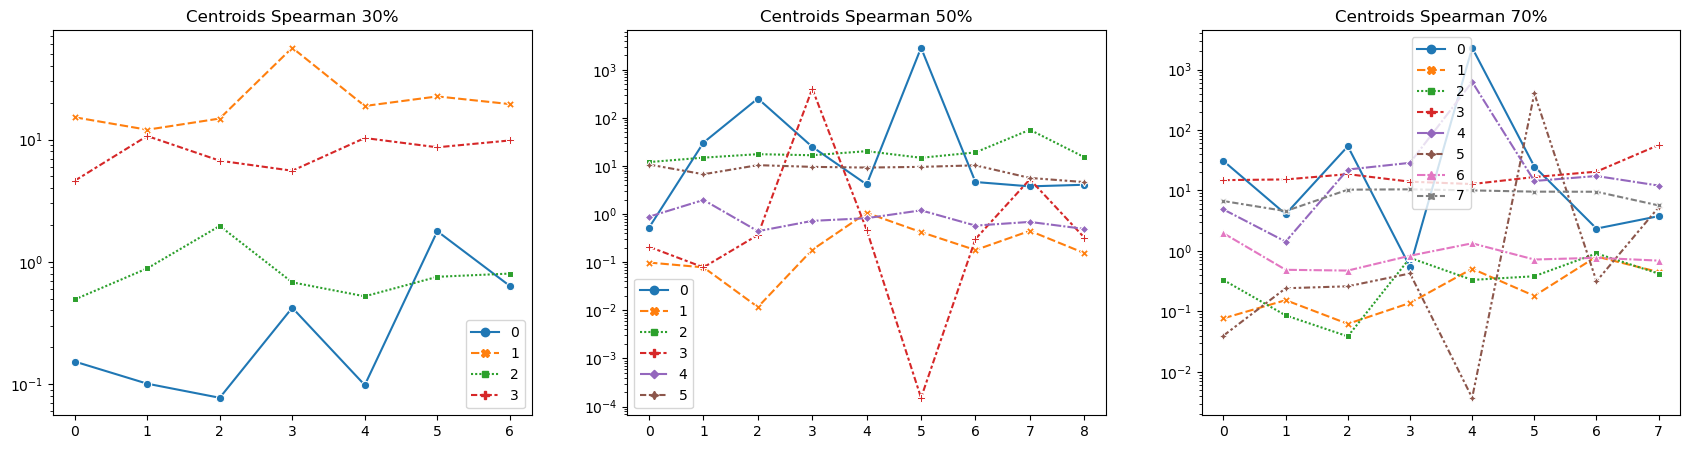

In [30]:
centers = {}
figline, (axline, axline2, axline3) = plt.subplots(1, 3, figsize=(21, 5))
for percentage in [30, 50, 70]:
    centers[percentage] = scalers[percentage].inverse_transform(kmeans[percentage].cluster_centers_)
    
sns.lineplot(centers[30], ax=axline, markers=True).set(title='Centroids Spearman 30%', yscale='log')
sns.lineplot(centers[50], ax=axline2, markers=True).set(title='Centroids Spearman 50%', yscale='log')
sns.lineplot(centers[70], ax=axline3, markers=True).set(title='Centroids Spearman 70%', yscale='log')

# Bar with bot discriminant flag

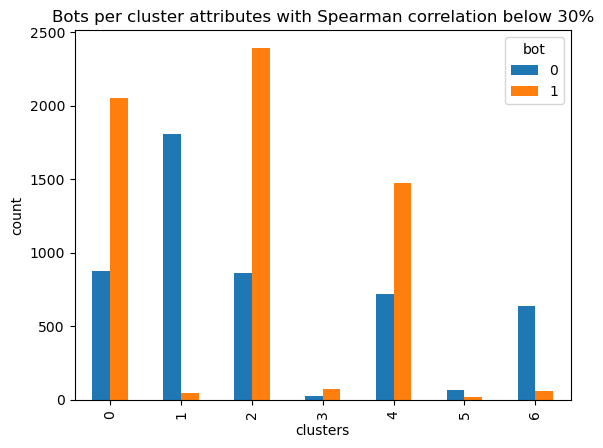

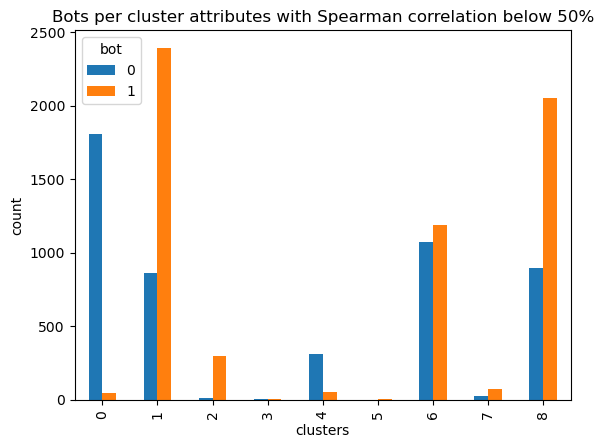

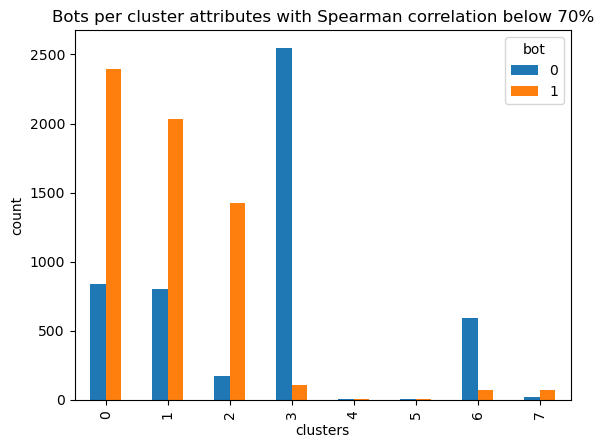

In [31]:
for percentage in [30, 50, 70]:
    bot_xt_pct = pd.crosstab(kmeans[percentage].labels_, users_df['bot'])
    bot_xt_pct.plot(kind='bar', stacked=False, 
                   title='Bots per cluster attributes with Spearman correlation below ' + str(percentage) + '%', ylabel='count', xlabel='clusters')


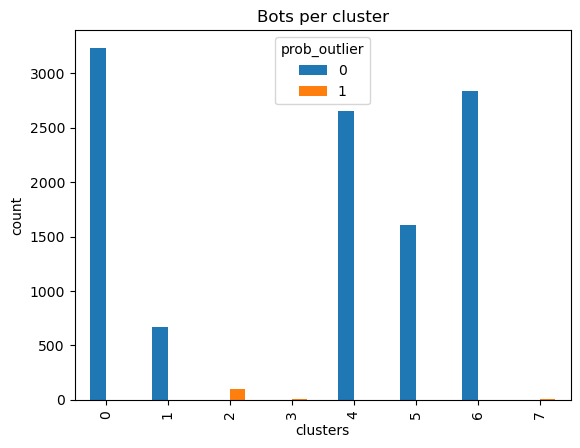

In [33]:
users_tmp = users_df.copy()
users_tmp['prob_outlier'] = pd.Series(kmeans[70].labels_, index=users_tmp.index)
values = users_tmp.groupby('prob_outlier', as_index=False).size()
values = values[values['size']<300]['prob_outlier']
users_tmp['prob_outlier'].mask(users_tmp['prob_outlier'].isin(values), other=10, inplace=True)
users_tmp['prob_outlier'].mask(users_tmp['prob_outlier']!=10, other=0, inplace=True)
users_tmp['prob_outlier'].mask(users_tmp['prob_outlier']==10, other=1, inplace=True)

bot_xt_pct = pd.crosstab(kmeans[70].labels_, users_tmp['prob_outlier'])
bot_xt_pct.plot(kind='bar', stacked=False, 
                title='Bots per cluster', ylabel='count', xlabel='clusters')
users_tmp = users_tmp[users_tmp['prob_outlier'] == 0]
users_tmp.drop(columns='prob_outlier', inplace=True)      
users_tmp.to_csv('../dataset/users_df_with_indicators_no_outliers.csv', index=False)

# KMeans Pearson Below 10% 



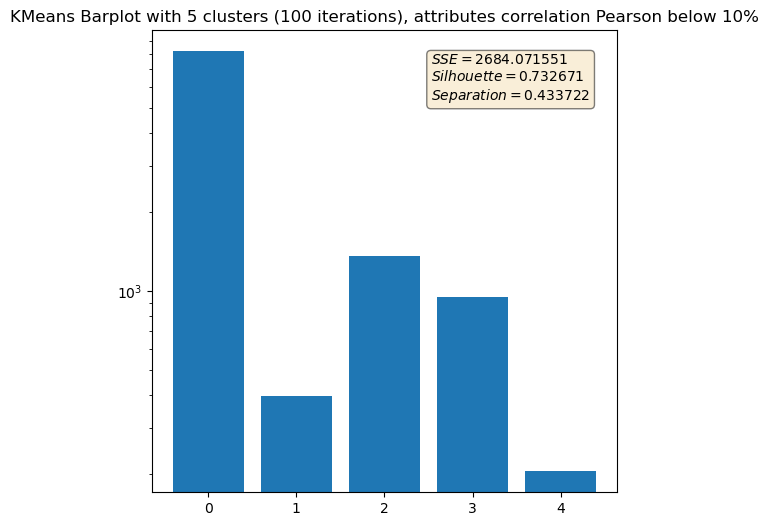

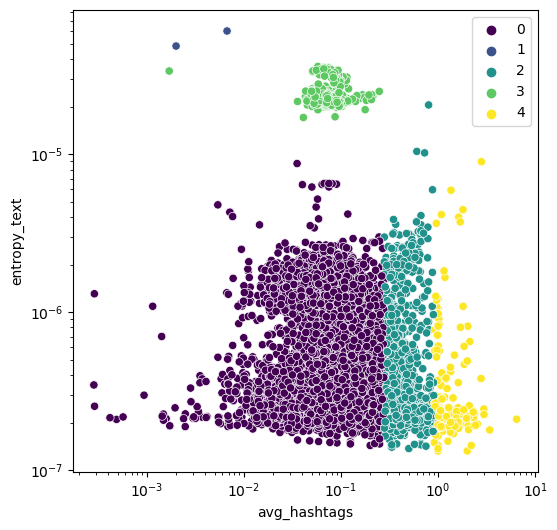

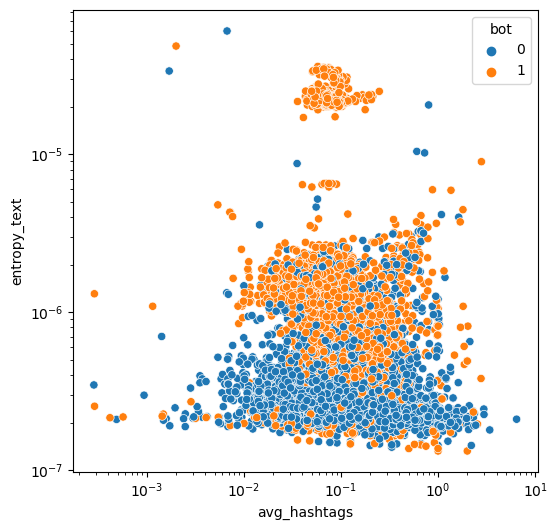

In [34]:
combination = ['entropy_text', 'avg_hashtags']
num_of_clusters = 5
num_of_iter = 100
percentage = 10


subset_df = users_df_10_pearson
scaler = StandardScaler()
scaler.fit(subset_df.values)
transform_result_pearson = scaler.fit_transform(subset_df.values)

kmeans_pearson = KMeans(n_clusters=num_of_clusters, n_init=10, max_iter=num_of_iter)
kmeans_pearson.fit(transform_result_pearson)

clusters_id, clusters_sizes = np.unique(kmeans_pearson.labels_, return_counts=True)

# Bar Plot for attribute with correlation below 0.7
fig, ax = plt.subplots(figsize=(6, 6))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.annotate(clustering_utils.get_clustering_metrics(kmeans_pearson, transform_result_pearson), xy=(0.60, 0.85), xycoords='axes fraction', bbox=props)
ax.set_title('KMeans Barplot with ' + str(num_of_clusters) + ' clusters (' + str(num_of_iter) +' iterations), attributes correlation Pearson below ' + str(percentage) + '%')
ax.bar(x=clusters_id, height=clusters_sizes, log=True)

# Scatter Plot for attribute with correlation below 0.7
fig1, ax1 = plt.subplots(figsize=(6, 6))
fig2, ax2 = plt.subplots(figsize=(6, 6))
sns.scatterplot(users_df, x=combination[1], y=combination[0], hue=kmeans_pearson.labels_, ax=ax1, palette='viridis')
sns.scatterplot(users_df, x=combination[1], y=combination[0], hue='bot', ax=ax2)

ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.set_yscale('log')
ax2.set_xscale('log')

# Visualization of clusters centers by means of parallel coordinates Pearson

Text(0.5, 1.0, 'KMeans cluster centers, attributes correlation Pearson below 10%')

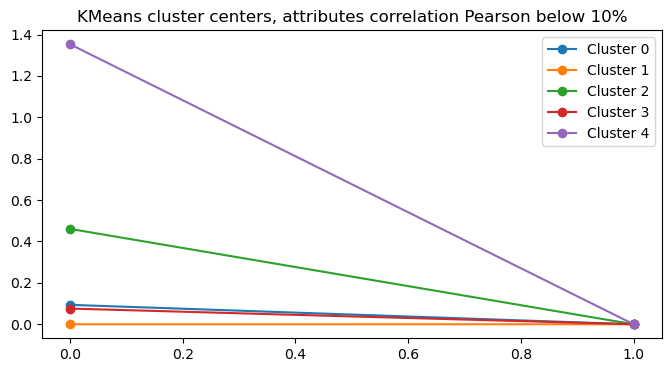

In [35]:
percentage = 10
centers = scaler.inverse_transform(kmeans_pearson.cluster_centers_)

figline, axline = plt.subplots(figsize=(8, 4))
for i in range(0, len(centers)):
    axline.plot(centers[i], marker='o', label='Cluster %s' % i)
axline.legend(fontsize=10)
axline.set_title('KMeans cluster centers, attributes correlation Pearson below ' + str(percentage) + '%')

# Bar with bot discriminant flag Pearson


<AxesSubplot: xlabel='Clusters', ylabel='Users'>

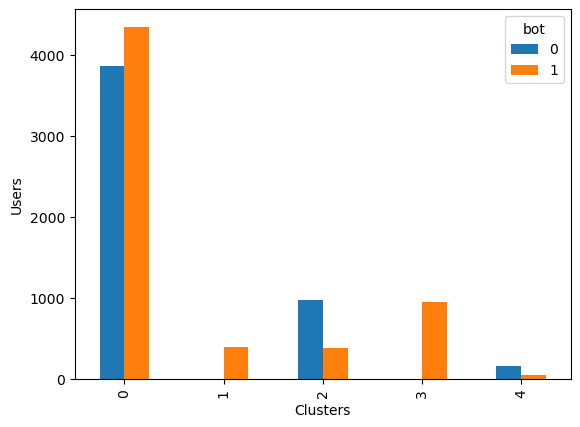

In [36]:
percentage = 10
bot_xt_pct = pd.crosstab(kmeans_pearson.labels_, users_df['bot'])
bot_xt_pct.plot(kind='bar', stacked=False, ylabel='Users', xlabel='Clusters') 
                # title='Bots per cluster attributes with Pearson correlation below ' + str(percentage) + '%', ylabel='count', xlabel='clusters')